<div style="background-color: #00FF00; padding: 20px;">
    <p style='text-align:center;
              font-family: sans-serif;
              font-weight:bold;
              color:black;
              font-size:50px;
              margin: 5px;'> 
        <font color='blue'; size='7'>Price Forecasting</font>
    </p>
    <p style="text-align:center;
              font-family: sans-serif;
              font-weight:bold;
              color:tomato;
              font-size:40px;
              margin: 10px;">
        TCN Model
    </p>
</div>
    </p>
</div>


<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
    Project Workflow
</h1>


### 1. Load and Preprocess Data:
- Load the data using `pandas`.
- Perform any necessary preprocessing, such as filling missing values, scaling the data, and splitting it into train and test sets.

### 2. Build the TCN Model:
- Design a simple TCN model using `Conv1D` layers, followed by dense layers.
- Compile the model with a suitable optimizer and loss function.

### 3. Fit the Model:
- Train the model on the training data and validate it on the test data.

### 4. Make Predictions:
- Predict on the test set using the trained model.

### 5. Evaluate the Model:
- Compute evaluation metrics such as MAE, MSE, and R².
- Plot `y_test` vs. `y_pred`.
- Store the results in a `pandas` DataFrame.


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='pandas')
warnings.filterwarnings("ignore", category=UserWarning, module='keras')

In [10]:
# Load the dataset
data = pd.read_csv('zinc_prices_IMF.csv')
data.head()

,Date,Price
0,1-Jan-80,773.82
1,1-Feb-80,868.62
2,1-Mar-80,740.75
3,1-Apr-80,707.68
4,1-May-80,701.07


In [11]:
# Assuming the dataset has a Date column and a target column 'Price'
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Feature Engineering: Using past 12 months as features to predict the next month
for i in range(1, 13):
    data[f'lag_{i}'] = data['Price'].shift(i)

# drop empty cells as shiting in the above process generates empty cells
data.dropna(inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8044\185809695.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [4]:
# Splitting into features (X) and target (y)
X = data.drop(columns=['Price'])
y = data['Price']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping the data for the Conv1D layer (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Building the TCN model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    Conv1D(filters=128, kernel_size=2, activation='relu'),  # Added an extra Conv1D layer
    Conv1D(filters=128, kernel_size=2, activation='relu'),  # Added another extra Conv1D layer
    Flatten(),
    Dense(100, activation='relu'),  # Increased the number of units in Dense layer
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Fitting the model
history = model.fit(X_train_scaled, y_train, epochs=500, validation_data=(X_test_scaled, y_test))

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1963694.3750 - val_loss: 4005768.7500
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1792903.0000 - val_loss: 3315441.7500
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1154731.0000 - val_loss: 270626.2812
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 503378.5312 - val_loss: 687243.0625
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 426319.0938 - val_loss: 351139.0000
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 296526.1250 - val_loss: 215365.4531
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 217580.1094 - val_loss: 238536.4062
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 179493.0938 - val_loss: 161662.5156
Epoch 9/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 145617.1406 - val_loss: 140414.5469
Epoch 10/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 103291.0547 - val_loss: 108061.9062
Epoch 11/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 

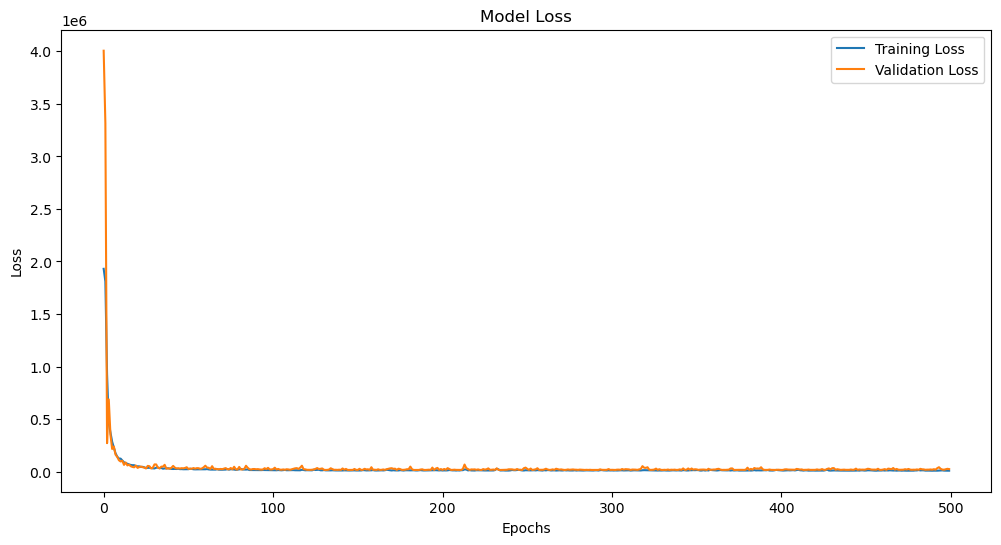

In [5]:
# Plotting the loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
MAE: 129.15004885684746, MSE: 23875.045272427622, R²: 0.6732663412551735


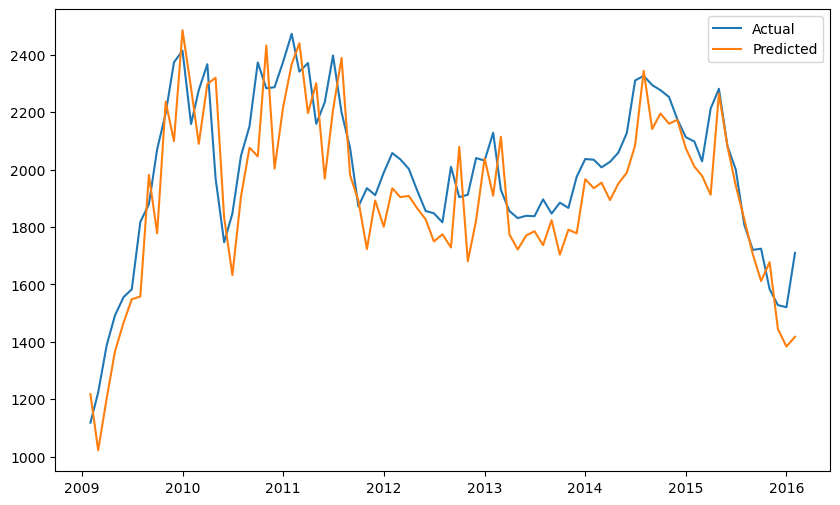

In [7]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()



In [8]:
# Storing the results in a DataFrame
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()}, index=y_test.index)
print(results_df.head())

             Actual    Predicted
Date                            
2009-02-01  1118.00  1217.561157
2009-03-01  1223.22  1021.752014
2009-04-01  1388.14  1203.437134
2009-05-01  1491.89  1366.446533
2009-06-01  1555.46  1466.250366


    1. Mean Absolute Error (MAE): 129
    Interpretation: MAE represents the average absolute difference between the predicted and actual values. In this case, on average, the model's predictions are off by about 129 units from the actual zinc prices.

    2. Mean Squared Error (MSE): 23875
     However, a lower MSE generally indicates a better fit, though it should be compared to the scale of the data.

    3. R² Score: 0.673
    Assessment: An R² value closer to 1 indicates a better fit, while a value closer to 0 suggests that the model is not capturing much of the underlying pattern. A value of 0.673 is moderately good, suggesting that the model explains more than half of the variance but still leaves a significant portion unexplained.